# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

**Important Note:** This notebook was AI-generated and has not been fully verified.
Use caution when interpreting the code or results.

This notebook demonstrates how to explore and analyze data from Dandiset 000690,
the Allen Institute Openscope - Vision2Hippocampus project. The Dandiset contains
data from experiments investigating how neural representations of visual stimuli
evolve from the LGN through V1, and hippocampal regions.

More information about the Dandiset can be found at:
https://dandiarchive.org/dandiset/000690

This notebook will cover the following:
1.  Loading the Dandiset metadata.
2.  Listing the assets (files) in the Dandiset.
3.  Loading an NWB file and exploring its contents.
4.  Visualizing eye tracking data.
5.  Visualizing running speed data.


**Required Packages:**
*   pynwb
*   h5py
*   remfile
*   matplotlib
*   seaborn
*   pandas
*   numpy


In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

Found 156 assets in the dataset

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049.nwb


## Loading an NWB file and exploring its contents

In this section, we will load one of the NWB files in the Dandiset and explore its contents.
We will load the file `sub-692072/sub-692072_ses-1298465622.nwb`.


In [2]:
import pynwb
import h5py
import remfile

# Load
url = "https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

nwb # (NWBFile)
print(f"Session description: {nwb.session_description}") # (str) Data and metadata for an Ecephys session
print(f"Identifier: {nwb.identifier}") # (str) 1298465622
print(f"Session start time: {nwb.session_start_time}") # (datetime) 2023-09-21T00:00:00-07:00

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: Data and metadata for an Ecephys session
Identifier: 1298465622
Session start time: 2023-09-21 00:00:00-07:00


## Visualizing Eye Tracking Data

This section demonstrates how to load and visualize eye tracking data from the NWB file.


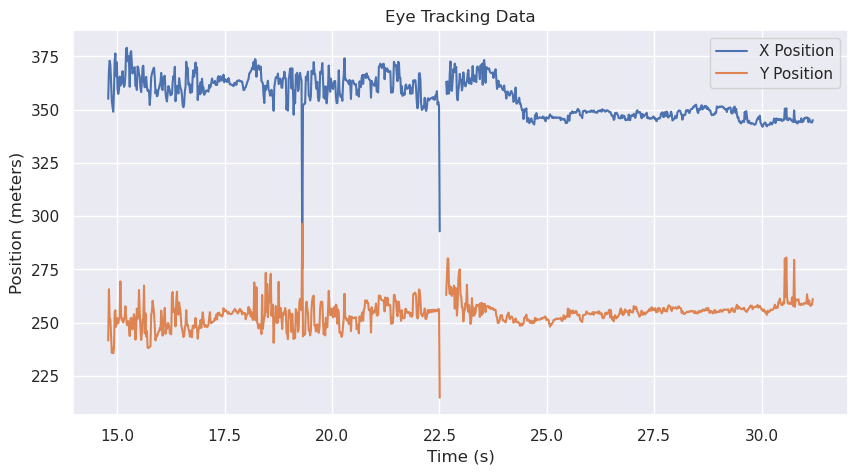

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np

# Load eye tracking data
eye_tracking_data = nwb.acquisition["EyeTracking"].spatial_series["eye_tracking"].data
eye_tracking_timestamps = nwb.acquisition["EyeTracking"].spatial_series["eye_tracking"].timestamps[:]
num_samples = 1000
# Plot the first 1000 samples of eye tracking data
plt.figure(figsize=(10, 5))
plt.plot(eye_tracking_timestamps[:num_samples], eye_tracking_data[:num_samples, 0], label="X Position")
plt.plot(eye_tracking_timestamps[:num_samples], eye_tracking_data[:num_samples, 1], label="Y Position")
plt.xlabel("Time (s)")
plt.ylabel("Position (meters)")
plt.title("Eye Tracking Data")
plt.legend()
plt.show()

## Visualizing Running Speed Data

This section demonstrates how to load and visualize running speed data from the NWB file.


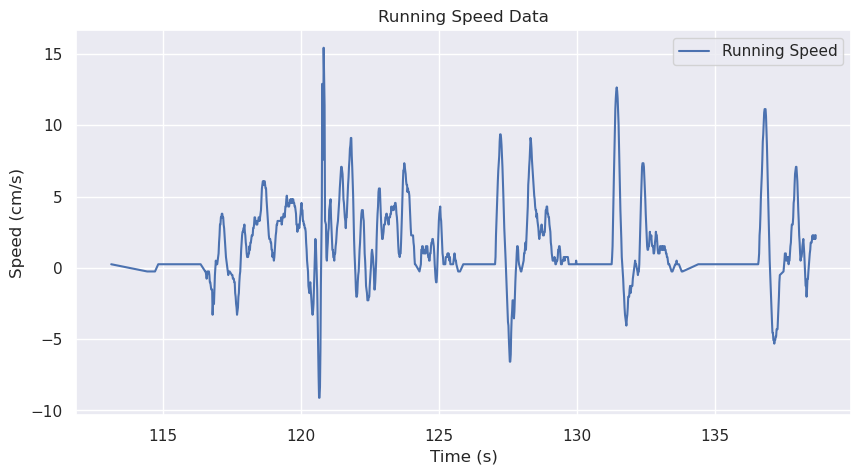

In [4]:
# Load running speed data
running_speed_data = nwb.processing["running"].data_interfaces["running_speed"].data
running_speed_timestamps = nwb.processing["running"].data_interfaces["running_speed"].timestamps[:]

# Plot the first 1000 samples of running speed data
plt.figure(figsize=(10, 5))
plt.plot(running_speed_timestamps[:num_samples], running_speed_data[:num_samples], label="Running Speed")
plt.xlabel("Time (s)")
plt.ylabel("Speed (cm/s)")
plt.title("Running Speed Data")
plt.legend()
plt.show()

## Summary and Future Directions

This notebook has demonstrated how to load and explore data from Dandiset 000690.
We have shown how to load the Dandiset metadata, list the assets, load an NWB file,
and visualize eye tracking and running speed data, showing samples of data from different series.

Future directions for analysis could include:
*   Exploring other data modalities in the NWB file, such as electrophysiology data.
*   Performing more advanced analysis of the eye tracking and running speed data.
*   Investigating the relationship between neural activity and behavior.